## Change of variables

First we are going to look at some basics. We are going to start of with basis distribution $\mathcal{N}(\mu=1, \sigma=0.1)$, we define this distribution in python and we apply a nummerical integral with np.trapz to validate the integral summing to 1

In [ ]:
import torch
import torch.distributions as dist
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

1.0


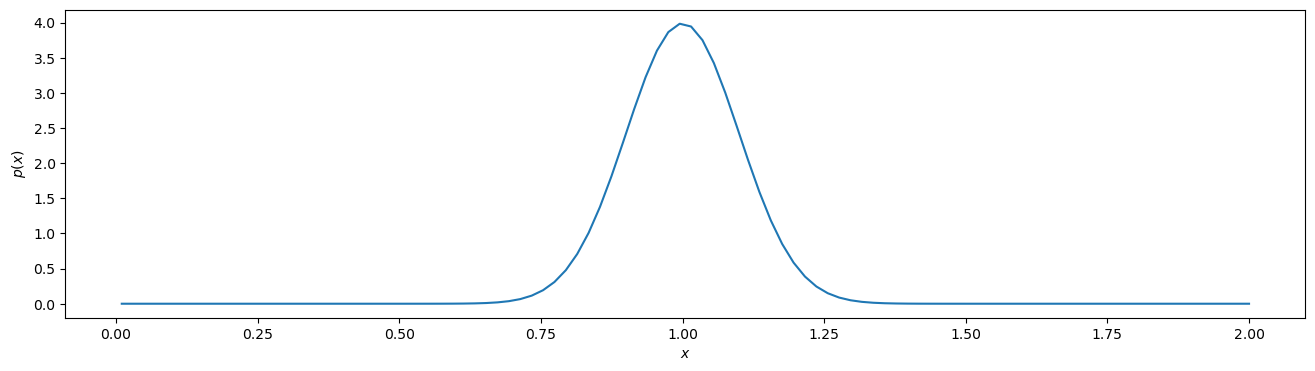

In [4]:
x = np.linspace(0.01,2,num=100)
base = stats.norm(1,0.1)
print(np.trapz(base.pdf(x),x))

plt.figure(figsize=(16, 4))
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.plot(x, base.pdf(x))


## Transformed base wo/ normalization.

By applying this transformation we’ve blown up the probability space  $ \int_{-\infty}^{\infty}  P(y) dy \gg 1$.We need a to modify this tranformation such that the integral over the entire domain evaluates to 1. Let’s define this a little bit more formally We want to transform $P(x)$ to another distribution $P(y)$ with

$f: \mathbb{R}^n \mapsto \mathbb{R}^n$.Because naively applying any possible f, would expand or shrink the probability mass of the distributions we need to constraint f such that


\begin{eqnarray}
\int_{-\infty}^{\infty}  P(x)dx &=&\int_{-\infty}^{\infty}  P(y)dy = 1  \; (1) \\ 
P(x)dx &=&P(y)dy  \; (2) \\
P(y) &=&P(x)\frac{dx}{dy}  \; (3)\label{normtransf}
\end{eqnarray}


To hold this constraint we need to multiply $P(x)$ with the derivative of $x$ w.r.t. $y$, $\frac{dx}{dy}$. Therefore we need to express x in y, which can only be done if the transformation f is invertible.

\begin{eqnarray}
f(x) &=& y  \; (4)\\
f^{-1}(y) &=& x \; (5) \label{invert}
\end{eqnarray}



Now we can rewrite eq. (3) in terms of eq. (5):

\begin{eqnarray}
 P(y) &=& P(f^{-1}(y))\frac{\text{d}f^{-1}(y)}{\text{d}y} \ (6) \\
 &=& P(f^{-1}(y))f'^{-1}(y) \label{Py} \;(7)
\end{eqnarray}

# 1D verification

Let’s verify this in Python. Besides $ f(x) = x^2$,we need $f^{-1}(y) = \sqrt(y)$ and $f'^{-1}(y) = \frac{1}{2 \sqrt(y)}$

5.641895835477563


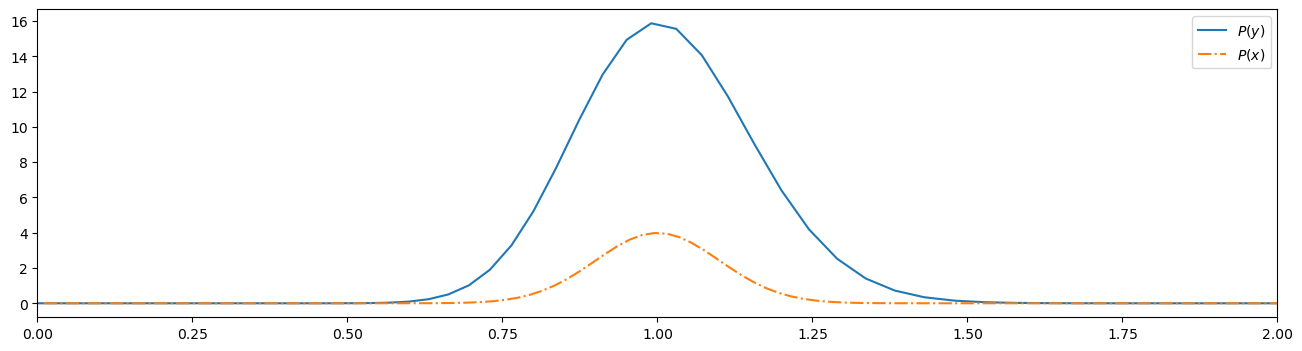

In [5]:
def f(x):return x**2
y = f(x)
transformed = f(base.pdf(x))
print(np.trapz(transformed,y))

plt.figure(figsize=(16, 4))
plt.xlim(0, 2)
plt.plot(y, transformed, label=r'$P(y)$')
plt.plot(x, base.pdf(x), label='$P(x)$', ls='-.')
plt.legend()



## Transformed base w/ normalization.

Save some small deviation due to nummerical discretization, the transformation sums to 1! We can also observe this in the plot we’ve made. Because of the transformation, the resulting probability distribution has become wider, wich (in case of a Gaussian distribution) must result in a less high probability peak, if the total probability mass is preserved.



0.9987379589284238

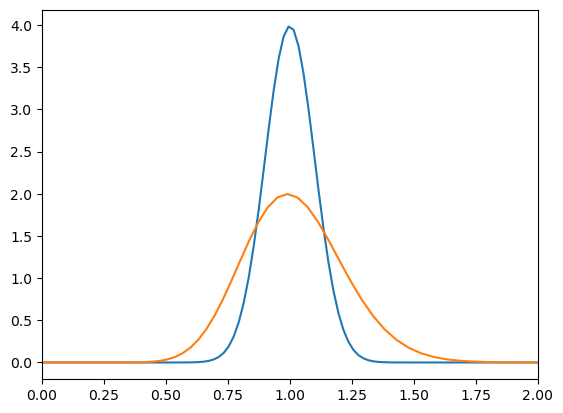

In [7]:
def f_i(y):return y**0.5
def f_prime(y):return 0.5*y**-0.5
assert np.allclose(f_i(f(x)),  x)
y = f(x)
px = base.pdf(x)
transformed = px * f_prime(f_i(y))

plt.plot(x, px)
plt.plot(y, transformed)
plt.xlim(0, 2)

np.trapz(transformed, y)

## Conditions

the function $f(x) = x^2$ we’ve used in the example above was strictly increasing (over the domain $\mathbb{R}_{>0}$.
This leads to a derivative $\frac{df}{dx}$ that always positive,if we would have chosen a strictly decreasing function $g,\frac{dg}{dx}$ would always be negative. In that case eq. (3) would be defined as $P(y) = - P(x) \frac{dy}{dx}$.We could however, by taking the absolute value of the derivative, easily come up with an equation that holds true for both cases:


\begin{eqnarray}
P(y)&=&P(x) \cdot \left| \frac{dx}{dy} \right| \; (8)\\
 &=& P(f^{-1}(y)) \cdot \left| f'^{-1}(y)\right| \;(9)
\end{eqnarray}


## Multiple dimensions

In multiple dimensions, the derivative $ \frac{dx}{dy}$ is expressed in the determinant of the Jacobian matrix. 

Let $f: \mathbb{R}^n \mapsto \mathbb{R}^m$ The jacobian is a $2D$ matrix that stores the first order partial derivatives of all the outputs $\{f_1, f_2, \dots, f_m \}$  (the height of the matrix) w.r.t. all the inputs $\{x_1, x_2, \dots, x_n \}$ (the width of the matrix).



\begin{align}
{J} =\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_n} \\[6pt]
\vdots & \ddots & \vdots \\[6pt]
\frac{\partial f_m}{\partial x_1} & \dots & \frac{\partial f_m}{\partial x_n} \\[6pt]
\end{bmatrix}
\end{align}


The dimensions of the probability distribution may not change due to the transformation,$f: \mathbb{R}^m \mapsto \mathbb{R}^m$ leading to a square jacobian matrix  $m \times m$.From a square matrix, we can determine the determinant. The determinant of a matrix $A$ tells us how much an $N-$dimensional  volume is scaled by applying the transformation  $A$.For $N-$dimensional ,wq (7) is written written with the determinant jacobian matrix.

\begin{eqnarray}
P(y)&=&P(f^{-1}(y)) \cdot \left| \det \frac{\partial{ f(y)^{-1} }}{\partial{y}} \right|  (11)\\ 
&=&P(f^{-1}(y)) \cdot \left| \det \mathbf{J}_{f^{-1}(y)} \right|  (12) \\ 
\end{eqnarray}

0.9905751293230018


0.9905751293230018

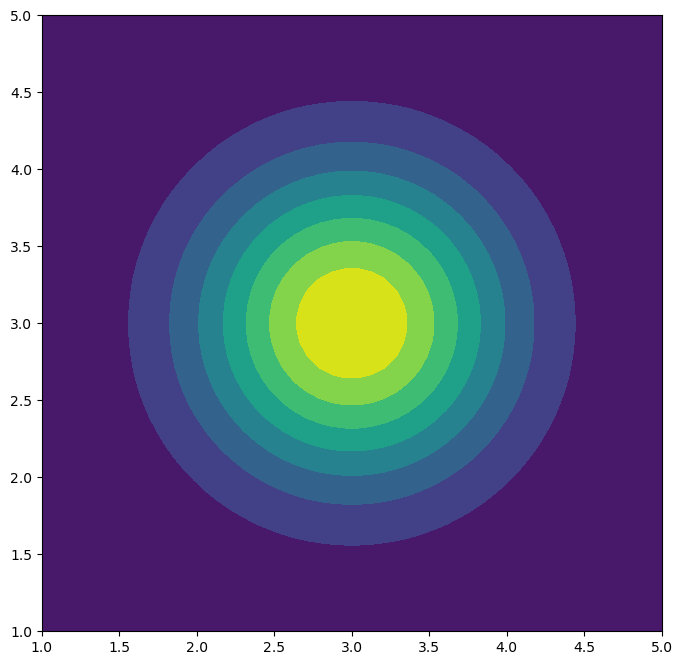

In [8]:
x1 = np.linspace(1, 5, num=50)
x2 = np.linspace(1, 5, num=50)
x1_s, x2_s = np.meshgrid(x1 ,x2)

base = stats.multivariate_normal(mean=[3, 3], cov=0.5)
assert base.pdf([3, 3]) > base.pdf([1, 1])

# field of all possible events X
x_field = np.concatenate([x1_s[..., None], x2_s[..., None]], axis=-1)

print(np.trapz(np.trapz(base.pdf(x_field), x_field[:, 0, 1], axis=0), x_field[0, :, 0]))

plt.figure(figsize=(8, 8))
plt.contourf(x1_s, x2_s, base.pdf(x_field))
np.trapz(np.trapz(base.pdf(x_field), x_field[:, 0, 1], axis=0), x_field[0, :, 0])

## Probability distribution of $X$

In [16]:


def f(x1, x2):
    return torch.exp(x1 / 3), x2**2

def f_i(y1, y2):
    return 3 * torch.log(y1), y2**0.5

#x_field = torch.tensor(x_field)
x_field = x_field.clone()
# Transform x events to y events
y_field = np.concatenate(f(x_field[..., 0, None], x_field[..., 1, None]), axis=-1)



Next we will need to define the jacobian matrix. For the purpose of this post, we’ll use a rather slow implementation, favoring readability

In [21]:


def create_det_jac(y_field):
    # create for every y1, y2 combination the determinant of the jacobian f_i(y1, y2)
    det_jac = np.zeros((y_field.shape[0], y_field.shape[1]))
    for i in range(y_field.shape[0]):
        for j in range(y_field.shape[1]):
            y_field = torch.tensor(y_field)
            #y_field = y_field.clone().requires_grad_(True)
            y_field.requires_grad_(True);
            fiy = torch.cat(f_i(y_field[..., 0, None], y_field[..., 1, None]), dim=-1)
            fiy[i, j].sum().backward()
            
            # Ouputs of the partial derivatives are independent.  I.e. f1 is dependent of y1 and not y2
            # and vice versa f2 is dependent of y2 and not y1
            # therefore the multiplication w/ 0 
            row1 = y_field.grad[i, j].data.numpy() * np.array([1., 0.])
            row2 = y_field.grad[i, j].data.numpy() * np.array([0., 1.])
            
            det = np.linalg.det(np.array([row1, row2]))
            det_jac[i, j] = det
    return det_jac



/home/yubaes/anaconda3/envs/DL/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


0.9907110850291531


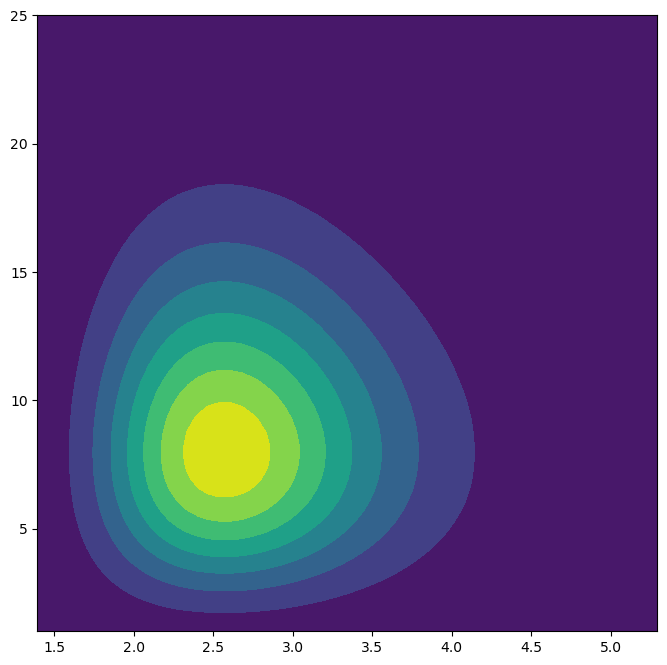

In [22]:
px = base.pdf(x_field)
transformed = px * np.abs(create_det_jac(y_field))

plt.figure(figsize=(8, 8))
plt.contourf(y_field[..., 0], y_field[..., 1], transformed)

print(np.trapz(np.trapz(transformed, y_field[:, 0, 1], axis=0), y_field[0, :, 0]))

## Probability distribution of $Y$

As we can see, we’ve transformed the base distribution while meeting the requirement of $\int P(y)dy=1$  by normalizing. Now we can continue applying these transformations in variational inference.

##  Normalizing flows

### Signle flow

Consider a latent variable model, with a latent variable $Z$ we’d like to infer. We choose a variational distribution $Q(z)$ over the latent variables Z. If we now have a invertible transformation 

$f: \mathbb{R}^m \mapsto \mathbb{R}^m$ $A$ transformation of the latent variable $z' = f(z)$ would have distribution $Q(z′)$.

\begin{eqnarray}
Q(z') &=& Q(z) \left| \det \frac{\partial{f^{-1}}}{\partial{z'}} \right|  (13) \\
Q(z') &=& Q(z) \left| \det \frac{\partial{f}}{\partial{z}} \right|^{-1} &\qquad \tiny{\text{Apply inverse function theorem}}  \; (14) \\ 
\log Q(z') &=& \log Q(z) - \log \left| \det \frac{\partial{f}}{\partial{z}} \right| \label{Qz1} (15)
\end{eqnarray}

*Note: by applying the inverse function theorem, $J_{f^-1}(q) = [J_f(p)]^{-1}$,We can rewrite the determinant in terms of the function $f$ instead of it’s inverse $f^{-1}$, and $z$ instead of $z′$, and the multiplication becomes a division because of the inverse matrix $A^{-1}$ $\log(A^{-1} = -\log A$.The inverse matrix notation should not be confused with inverse function notation.

## K-flows

Because the flows have to be invertible, they are not likely to be very complex. Luckily, many simple transformations lead to more complex transformations. We like to obtain a complex random variable $Z_{k}$, by passing a simple random variable $Z_{0}$ through multiple flows, a flow composition.

\begin{eqnarray}
z_k = f_k \circ \dots \circ f_2 \circ f_1(z_0) \;(16)
\end{eqnarray}

Eq. (15) for k flows becomes:

\begin{eqnarray}
\log Q(z_K) = \log Q(z_0) - \sum_{k=1}^{K} \log \left| \det \frac{\partial{f_k}}{\partial{z_{k-1}}} \right| \label{qzk} (17)
\end{eqnarray}


## Planar flows

 The planar flow transformation is defined as:
 
 \begin{equation}
f(z) = z + u h(w^Tz + b)
\end{equation}

Here $\{ z \in \mathbb{R}^D, u \in \mathbb{R}^D, b\in \mathbb{R} \}$ are parameters we need to find by optimization. The function h(⋅) needs to be a smooth non linear function (the writers recommend using tanh(⋅)). Determining a determinant jacobian can be a very expensive operation, for invertible neural networks they are at least $\mathcal{O}(D^3)$ Besides the invertibility constraint, cheaply computed log determinant jacobians should also be taken into consideration, if you wanted to design your own flows. With planar flows it has been. The complexity is reduced to $\mathcal{O}(D)$,by using the matrix determinant lemma $\det(I + uv^T) = (1 + v^Tu)$

\begin{eqnarray}
\psi(z) &=& h'(w^Tz + b)w \\
\left| \det \frac{\partial{f}}{\partial{z}} \right| &=& \left| \det(I + u \psi (z)^T)  \right| = \left| 1+u^T \psi (z)  \right|
\end{eqnarray}

That’s all we need!